In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from CalculateMetrics import calculate_all_metrics
import matplotlib.pyplot as plt
from EnderClassifierBoundedFast import EnderClassifier as ECBF
from EnderClassifierModified import EnderClassifier as ECM

# df = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS.csv.gz", compression='gzip', header=None)
# X_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_X.csv", header=None)
# y_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_y.csv", header=None)
X_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_X_10k.csv", header=None)
y_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_y_10k.csv", header=None)

In [4]:
# df.columns = [str(i) for i in range(df.shape[1])]
# print("Class 0:", df["0"].value_counts())
# X = df.drop(columns=["0"])  # Assuming the first column is the target variable
# y = df.iloc[:, 0].astype(int)  # Assuming the first column is the target variable

# _, X_sample, _, y_sample = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
# X_sample.to_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_X_10k.csv", index=False, header=False)
# y_sample.to_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_y_10k.csv", index=False, header=False)

y_sample = y_sample.iloc[:, 0].astype(int)  # Ensure y_sample is a Series of integers
X_sample.columns = [str(i) for i in range(X_sample.shape[1])]
print("Sampled class 0:", y_sample.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

Sampled class 0: 0
1    5299
0    4701
Name: count, dtype: int64


In [5]:
def run_test(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1:
        y_pred = np.array([np.argmax(pred) for pred in y_pred])
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(name)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report - Test:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    labels = ['Class 0', 'Class 1']
    print("Confusion Matrix:")
    print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
    print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
    print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

XGBoost Classifier
Accuracy: 0.6835
ROC AUC: 0.7483
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       940
           1       0.69      0.72      0.71      1060

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             606                 334                   # True Negative (TN), False Positive (FP)
Class 1             299                 761                   # False Negative (FN), True Positive (TP)


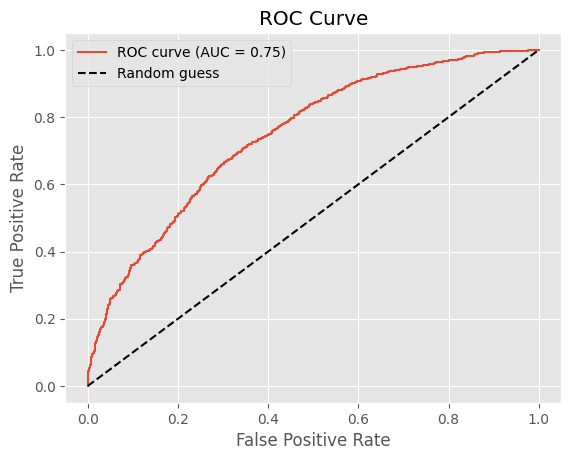

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
run_test(xgb_model, "XGBoost Classifier", X_train, y_train, X_test, y_test)
# 0.2s

Ender Classifier Modified
Accuracy: 0.6435
ROC AUC: 0.7083
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56       940
           1       0.63      0.79      0.70      1060

    accuracy                           0.64      2000
   macro avg       0.65      0.63      0.63      2000
weighted avg       0.65      0.64      0.63      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             448                 492                   # True Negative (TN), False Positive (FP)
Class 1             221                 839                   # False Negative (FN), True Positive (TP)


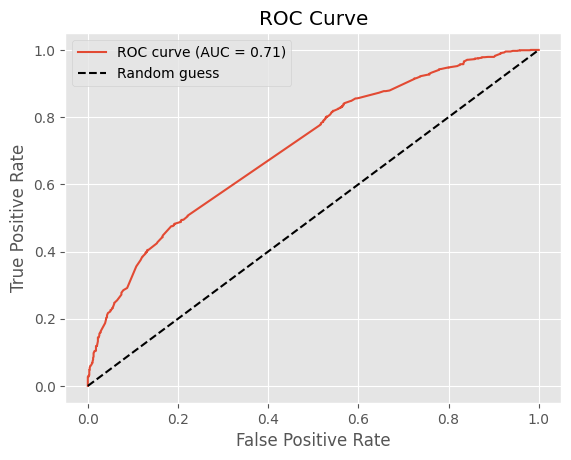

In [ ]:
ecm = ECM(verbose=False, n_rules=30, use_gradient=False)
run_test(ecm, "Ender Classifier Modified", X_train, y_train, X_test, y_test)
# 2.1s

Ender Classifier Modified with Gradient
Accuracy: 0.6520
ROC AUC: 0.7156
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       940
           1       0.67      0.69      0.68      1060

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             573                 367                   # True Negative (TN), False Positive (FP)
Class 1             329                 731                   # False Negative (FN), True Positive (TP)


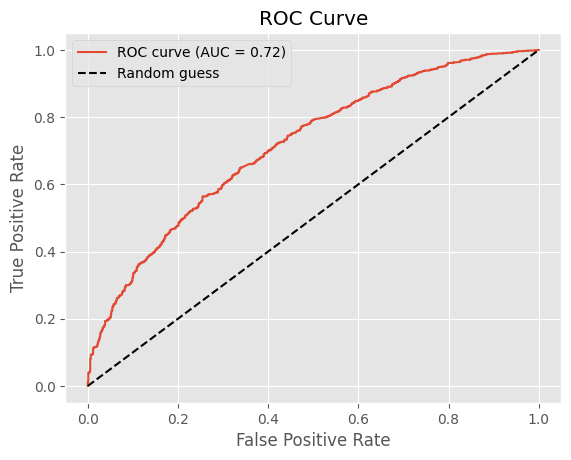

In [ ]:
ecm = ECM(verbose=False, n_rules=25, use_gradient=True)
run_test(ecm, "Ender Classifier Modified with Gradient", X_train, y_train, X_test, y_test)
# 5.0s

Ender Classifier Bounded Fast
Accuracy: 0.6670
ROC AUC: 0.7254
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       940
           1       0.70      0.66      0.68      1060

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             636                 304                   # True Negative (TN), False Positive (FP)
Class 1             362                 698                   # False Negative (FN), True Positive (TP)


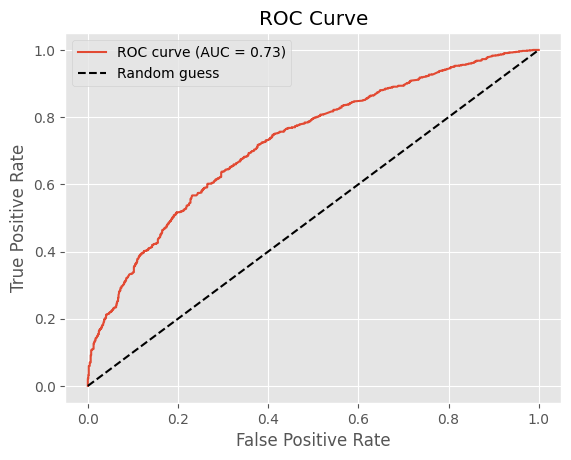

In [ ]:
ecbf = ECBF(verbose=False, n_rules=28, use_gradient=False)
run_test(ecbf, "Ender Classifier Bounded Fast", X_train, y_train, X_test, y_test)
# 4.3s

Ender Classifier Bounded Fast with Gradient
Accuracy: 0.6510
ROC AUC: 0.7214
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       940
           1       0.68      0.64      0.66      1060

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             624                 316                   # True Negative (TN), False Positive (FP)
Class 1             382                 678                   # False Negative (FN), True Positive (TP)


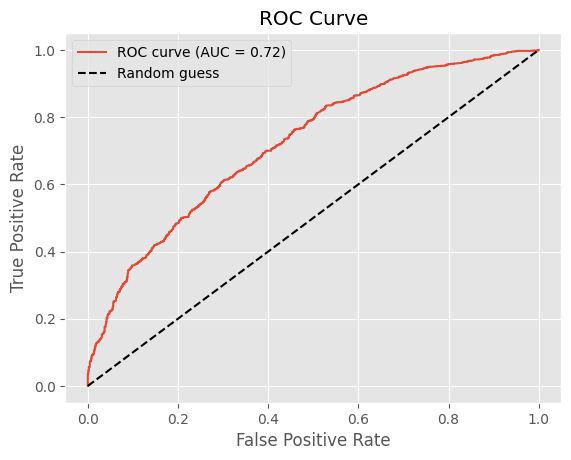

In [ ]:
ecbf = ECBF(verbose=False, n_rules=34, use_gradient=True)
run_test(ecbf, "Ender Classifier Bounded Fast with Gradient", X_train, y_train, X_test, y_test)
# 11.8s

In [20]:
ENDER=ECBF

for n in range(24, 35, 2):
    print(f"Testing with n_rules={n}")
    ender = ENDER(verbose=False, n_rules=n, use_gradient=True)
    ender.fit(X_train, y_train)
    y_pred = ender.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_probs = ender.predict_proba(X_test)
    print(f"n_rules={n}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"n_rules={n}, ROC AUC: {roc_auc_score(y_test, y_probs[:, 1]):.4f}")
    print("================================")

Testing with n_rules=24
n_rules=24, Accuracy: 0.6460
n_rules=24, ROC AUC: 0.7151
Testing with n_rules=26
n_rules=26, Accuracy: 0.6490
n_rules=26, ROC AUC: 0.7158
Testing with n_rules=28
n_rules=28, Accuracy: 0.6505
n_rules=28, ROC AUC: 0.7178
Testing with n_rules=30
n_rules=30, Accuracy: 0.6505
n_rules=30, ROC AUC: 0.7187
Testing with n_rules=32
n_rules=32, Accuracy: 0.6495
n_rules=32, ROC AUC: 0.7205
Testing with n_rules=34
n_rules=34, Accuracy: 0.6510
n_rules=34, ROC AUC: 0.7214


Ender Classifier Bounded Fast
Accuracy: 0.6645
ROC AUC: 0.7119
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       940
           1       0.69      0.68      0.68      1060

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             609                 331                   # True Negative (TN), False Positive (FP)
Class 1             340                 720                   # False Negative (FN), True Positive (TP)


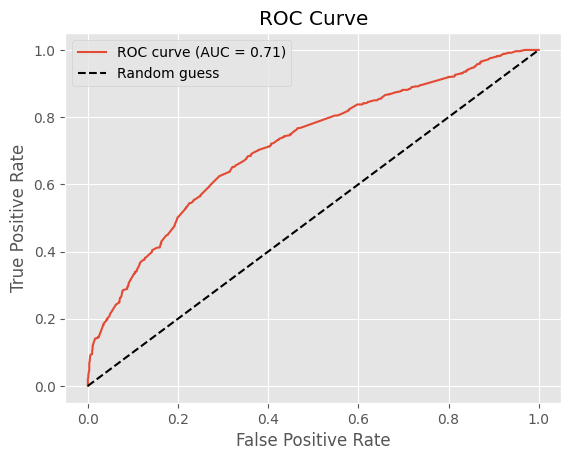

In [6]:
ecbf = ECBF(verbose=False, n_rules=14, use_gradient=False)
run_test(ecbf, "Ender Classifier Bounded Fast", X_train, y_train, X_test, y_test)

In [7]:
# from EnderClassifierModified import EnderClassifier
from EnderClassifierBoundedFast import EnderClassifier

print("ENDER CLASSIFIER BOUNDED FAST")
ender = EnderClassifier(verbose=True, n_rules=30, use_gradient=True)
ender.fit(X_train, y_train, X_test=X_test, y_test=y_test)

ENDER CLASSIFIER BOUNDED FAST
Default rule: [-0.05983265  0.05983265]
####################################################################################
Rule: 1
Default Rule: MSE = 0.249104496339643
Squared errors calculated in 0.0020 seconds
	25 in [0.6478667855262756, 1.041028618812561]
	26 in [0.7604845762252808, 1e+308]
	3 in [-1e+308, 2.2303833961486816]
	0 in [0.27570319175720215, 2.6538147926330566]
	24 in [-1e+308, 2.633076786994934]
	2 in [-1.742230772972107, 1e+308]
	18 in [-2.49351704120636, 2.49176287651062]
	4 in [-1e+308, 1.7430710792541504]
	9 in [0.19200283288955683, 5.326095819473267]
	15 in [-1e+308, 1.7420517802238464]
	5 in [0.20712391287088394, 4.347037315368652]
	13 in [0.2636954337358475, 1e+308]
	27 in [0.6278151571750641, 1e+308]
	1 in [-2.417444586753845, 1e+308]
	21 in [0.13639998435974116, 1e+308]
	6 in [-2.9672493934631348, 2.952345132827759]
	14 in [-1e+308, 2.7286434173583984]
	19 in [-1.742413282394409, 1e+308]
	22 in [0.40099555253982544, 1e+308]
=> v

In [15]:
ender.evaluate_all_rules()

100%|██████████| 3/3 [00:00<00:00, 17.81it/s]


In [9]:
y_preds = ender.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
y_probs = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.67825
ROC AUC: 0.7452877688730005
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66      9402
           1       0.70      0.68      0.69     10598

    accuracy                           0.68     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.68      0.68      0.68     20000

Confusion Matrix:
 [[6378 3024]
 [3411 7187]]


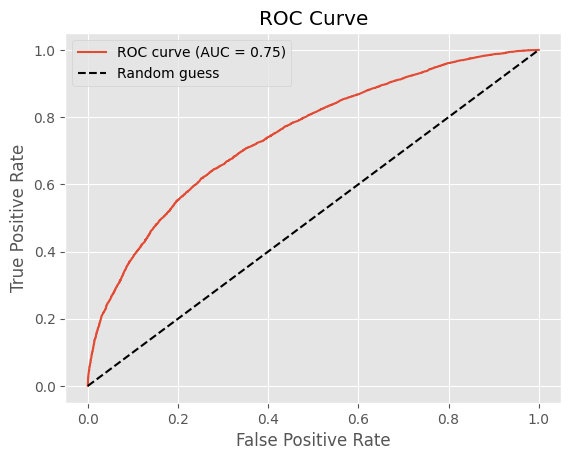

In [10]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from EnderClassifierModified import EnderClassifier

print("ENDER CLASSIFIER MODIFIED")
ender_modified = EnderClassifier(verbose=False, n_rules=30, use_gradient=True)
ender_modified.fit(X_train, y_train, X_test=X_test, y_test=y_test)

ENDER CLASSIFIER MODIFIED


In [5]:
y_preds = ender_modified.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
y_probs = ender_modified.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.69525
ROC AUC: 0.766006790924618
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      9402
           1       0.72      0.70      0.71     10598

    accuracy                           0.70     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.70      0.70      0.70     20000

Confusion Matrix:
 [[6469 2933]
 [3162 7436]]


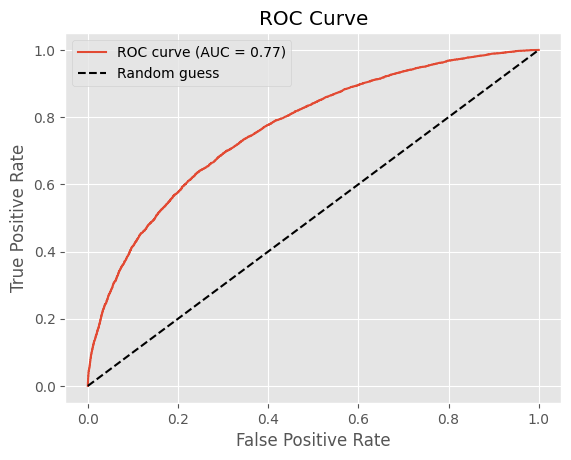

In [6]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_preds = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
# y_probs = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.72
ROC AUC: 0.7979802643445065
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      9402
           1       0.73      0.75      0.74     10598

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.72      0.72      0.72     20000

Confusion Matrix:
 [[6485 2917]
 [2683 7915]]


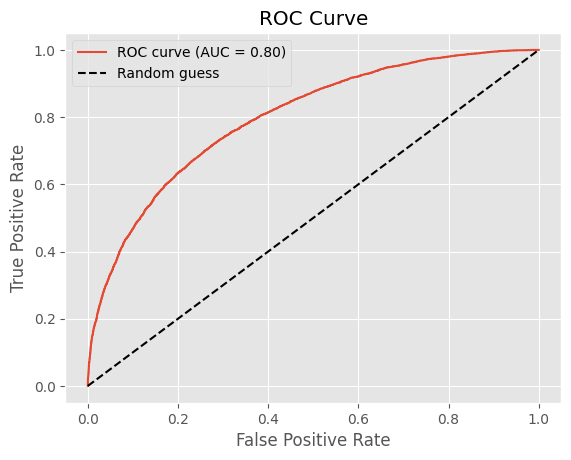

In [23]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()